In [1]:
cd trimmed-150nts/

/Users/yoshikivazquezbaeza/Documents/PDF/KnightLaboratory/HastyWater/trimmed-150nts


In [2]:
%matplotlib inline
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, qiime2 as q2

sns.set_style('whitegrid')

In [3]:
from biom import load_table, Table
from biom.util import biom_open

from qiime2.plugins import diversity, feature_table, metadata, taxa, emperor

def load_mf(fn, index='#SampleID'):
    _df = pd.read_csv(fn, sep='\t', dtype=str, keep_default_na=False, na_values=[])
    _df.set_index(index, inplace=True)
    return _df

The only digesters and columns that we anlyze in this noteboook.

In [4]:
digesters = ["Digester1", "Digester2", "Digester3", "Digester4"]
columns = ['ph','cod', 'phosphorousr', 'phosphoroust',
           'ammonian', 'alkalinity', 'nitraten', 'nitrogent',
           'volatile_fatty_acids', 'tss_vss', 'faith_pd',
           'observed_otus', 'shannon']

In [5]:
mf = load_mf('mapping-file.alpha.tsv')

for column in columns + ['day']:
    mf[column] = pd.to_numeric(mf[column], errors='coerce')

Each folder contains plots for all the digesters.

In [6]:
mkdir -p regressions jointplots matrices

Correlations between time and different environmental variables.

/Users/yoshikivazquezbaeza/miniconda/envs/qiime2-2018.4/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


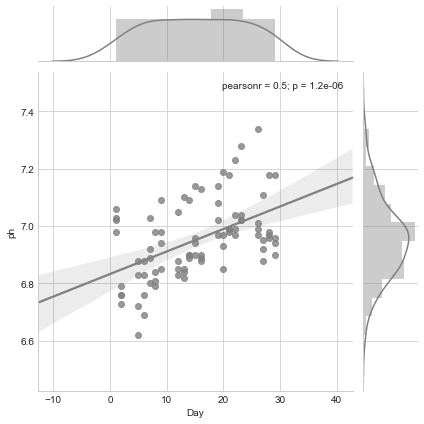

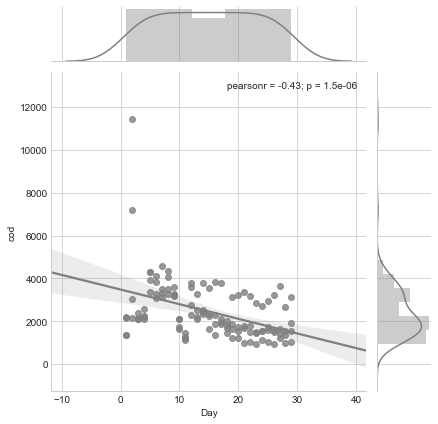

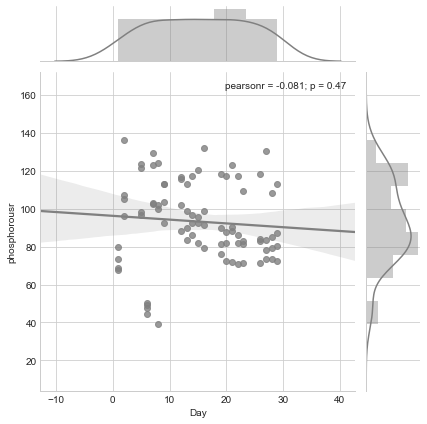

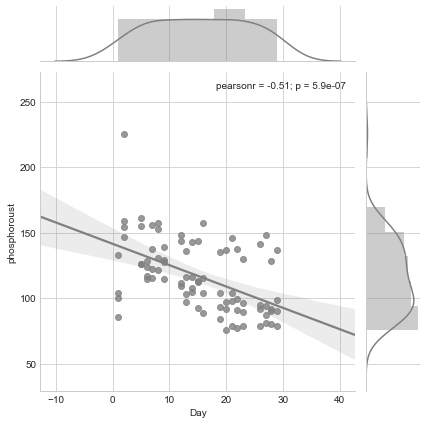

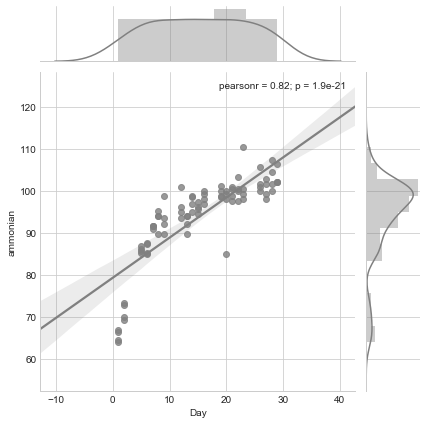

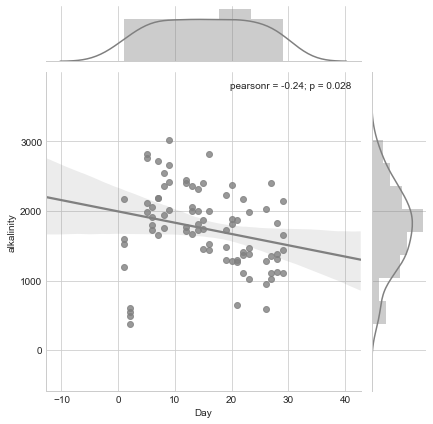

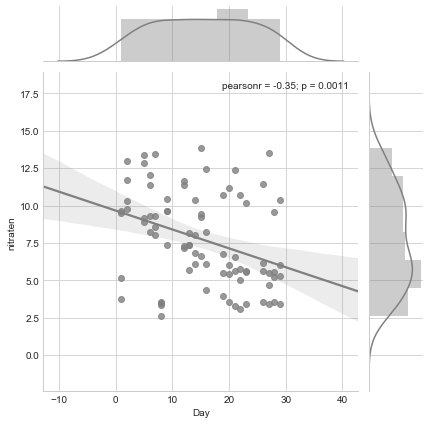

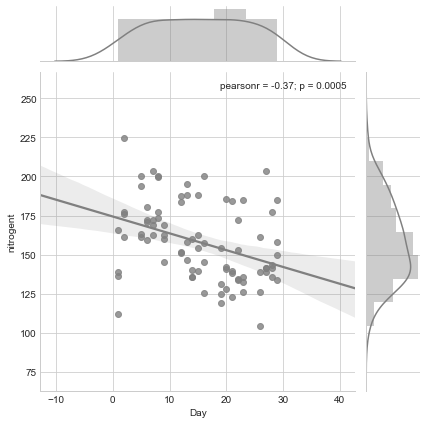

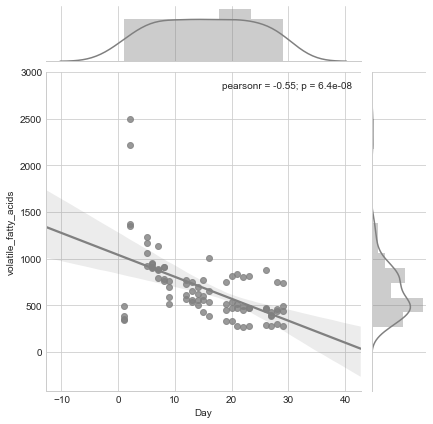

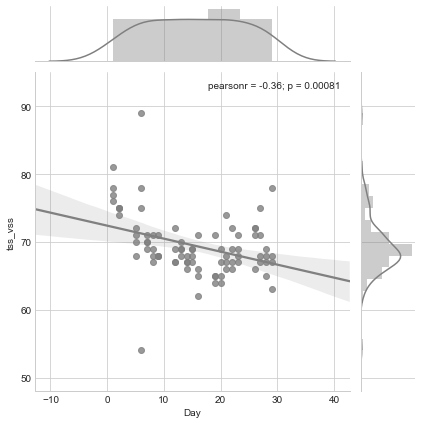

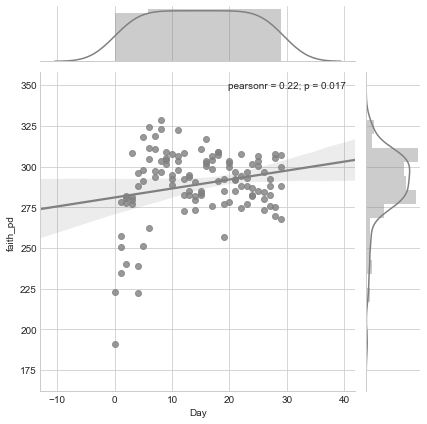

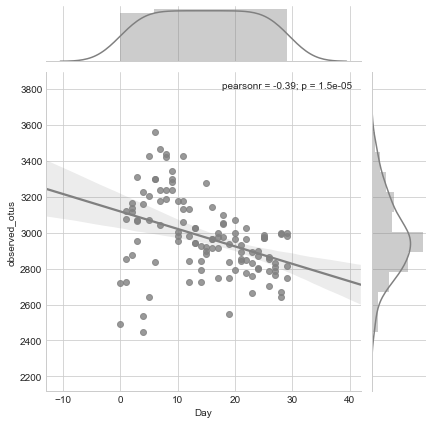

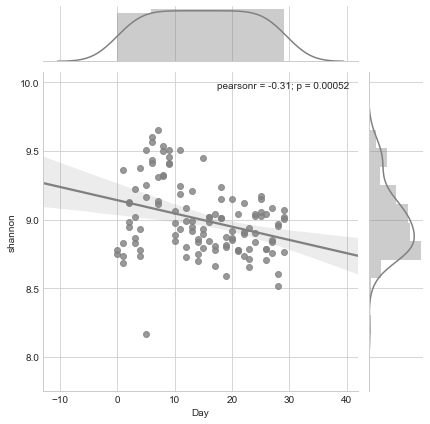

In [7]:
for column in columns:
    g = sns.jointplot("day", column, data=mf, color='gray', kind='reg')
    g.set_axis_labels(xlabel='Day', ylabel=column)
    plt.savefig('jointplots/%s.pdf' % column, dpi=326, bbox_inches='tight')

Linear regressions between time and environmental variables on a per-digester basis.

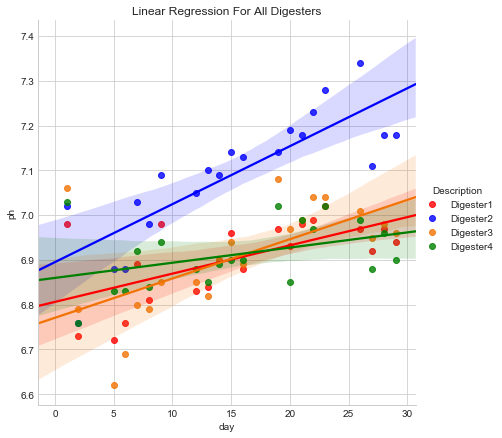

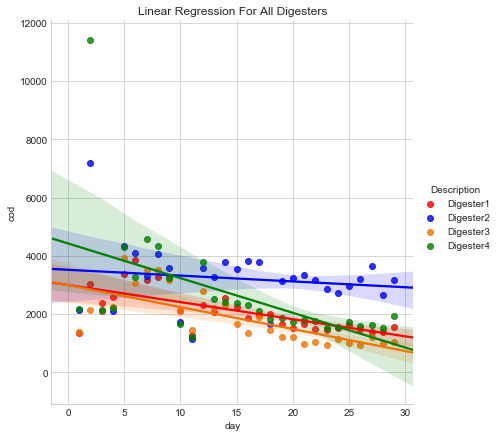

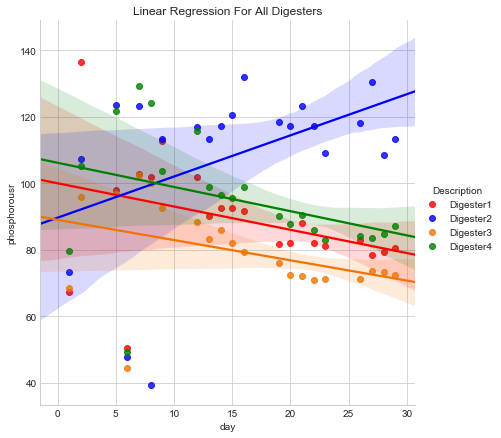

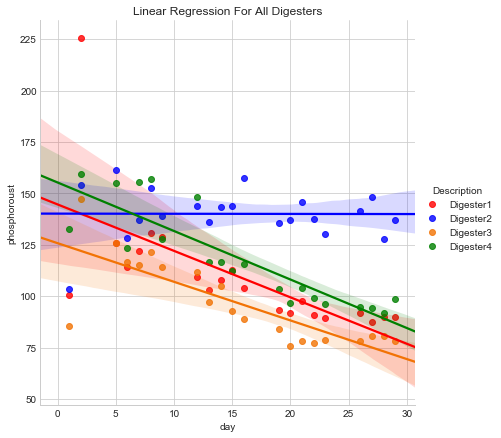

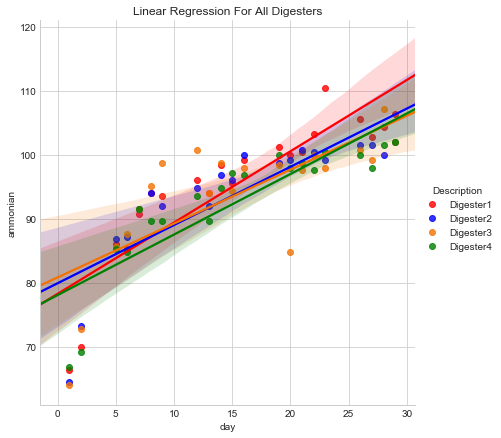

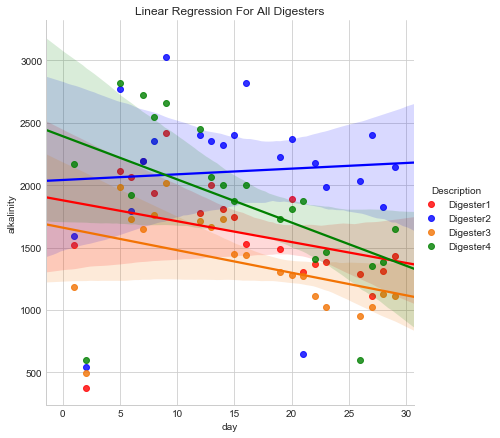

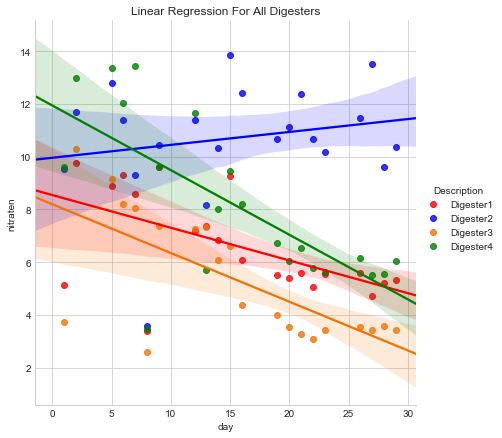

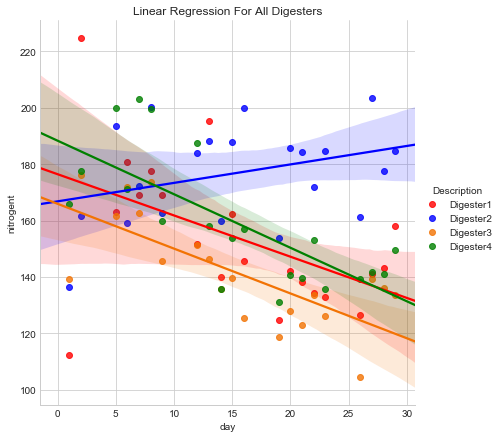

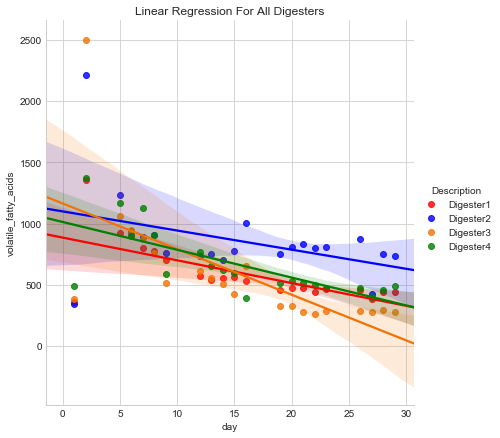

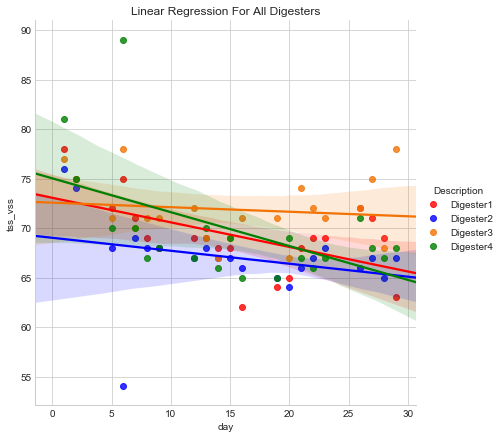

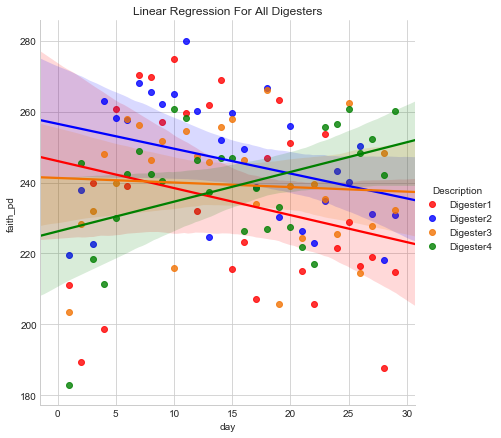

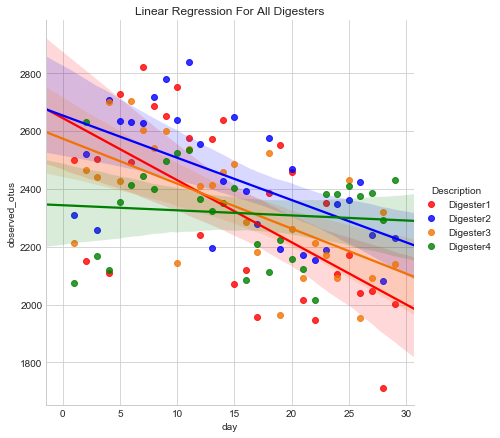

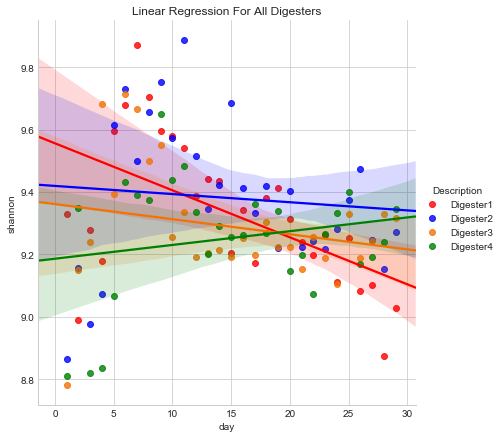

In [8]:
palette = {'Digester1': '#ff0000', 'Digester2': '#0000ff', 'Digester3': '#f27304', 'Digester4': '#008000'}
for column in columns:
    g = sns.lmplot("day", column, hue="Description", data=mf,
                   hue_order=digesters, size=6, palette=palette)
    g.set_axis_labels(x_var='day', y_var=column)
    plt.title('Linear Regression For All Digesters')
    plt.savefig('regressions/%s.pdf' % column, dpi=326, bbox_inches='tight')

# Correlation matrices

In [9]:
!mkdir -p matrices

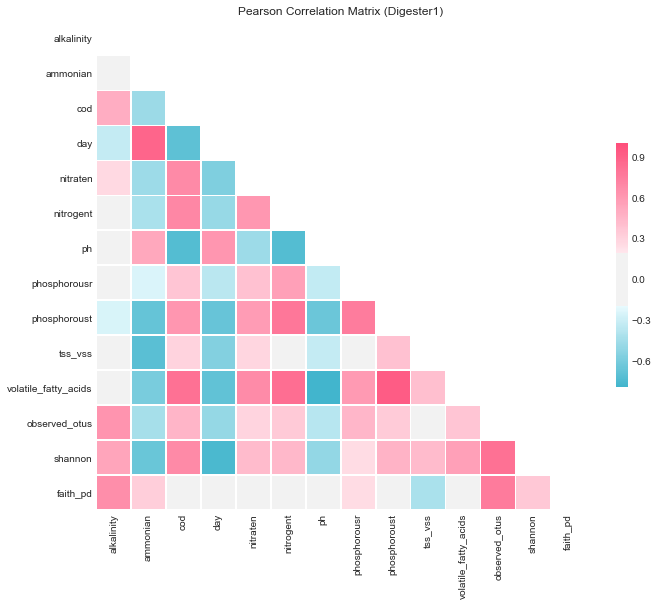

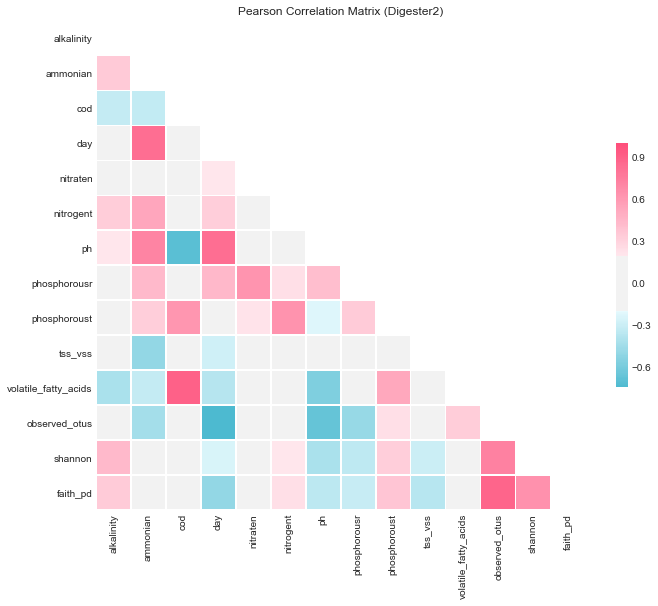

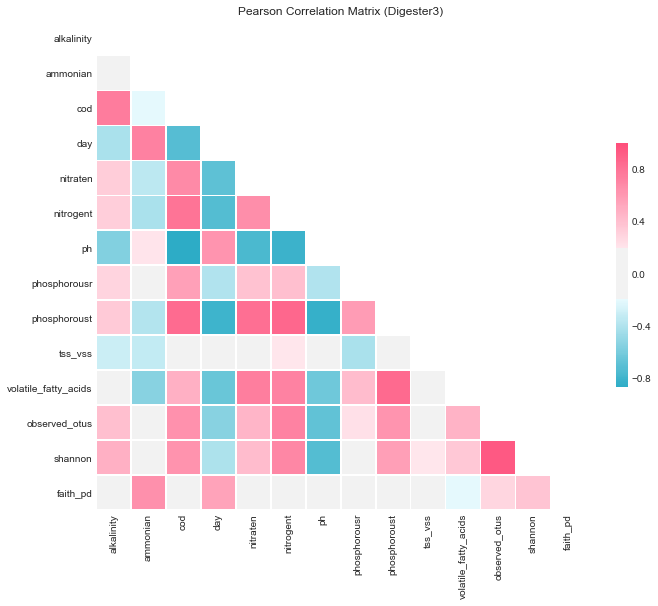

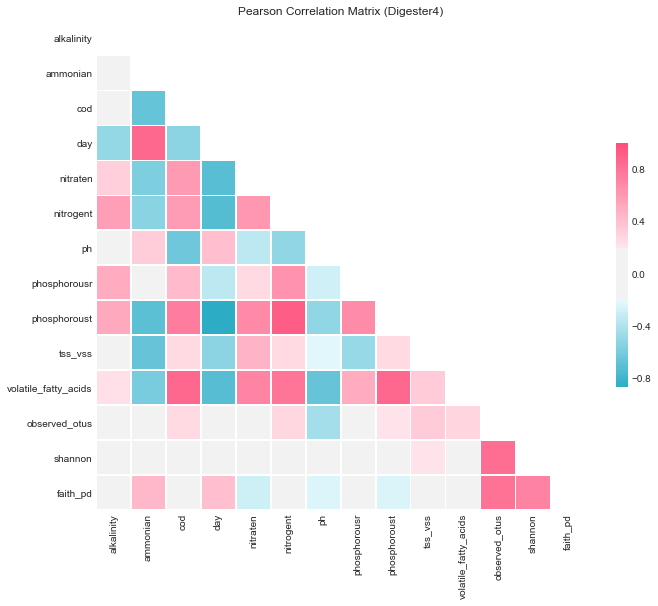

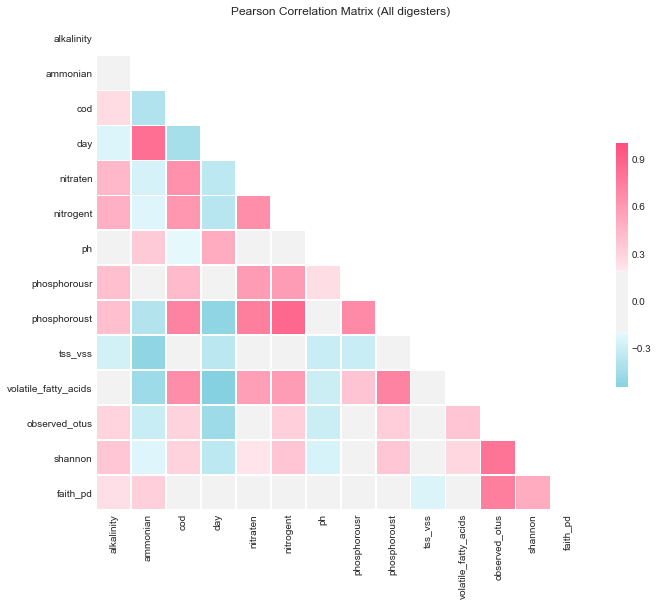

In [10]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 2, 99, 60, 50, as_cmap=True)

for digester in digesters:
    # sub_df = mf[mf.Description == digester]
    
    # Compute the correlation matrix
    corr = mf[mf.Description == digester].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    # plt.figure()
    # sns.corrplot(mf, annot=False, sig_stars=True, diag_names=False,
    #              sig_tail='both', cmap=cmap, method='pearson')
    plt.title('Pearson Correlation Matrix (%s)' % digester)
    plt.savefig('matrices/%s.pdf' % digester, dpi=326, bbox_inches='tight')

    
# Compute the correlation matrix
corr = mf[mf.Description.isin(digesters)].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pearson Correlation Matrix (All digesters)')
plt.savefig('matrices/all.pdf', dpi=326, bbox_inches='tight')